In [170]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy import stats
import matplotlib.dates as mdates

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [171]:
def separateYear(x):
    yearcount = {str(i):0 for i in range(2015,2022)}
    for i in x.index:
        for j in yearcount:
            if j in str(i):
                yearcount[j] += 1
    return yearcount

## import dataset

In [172]:
gold =pd.read_csv("./dataset/gld_price_data.csv")
bit = pd.DataFrame(pd.read_csv('./dataset/bit_data.csv'), columns={'Date','Close'})

In [173]:
# reorder columns
bit = bit[['Date','Close']]

In [174]:
# list all data and label
df = [gold,bit]
name = ['gld_price','bitcoin_price']

In [175]:
### rename all data columns
for i in range(len(df)):
    df[i] = df[i].rename(columns={df[i].columns[0]:'date',df[i].columns[1]:name[i]})

In [176]:
### set date as index and join all data
data = df[0].set_index('date')
for i in range(len(df)):
    if i > 0:
        data = data.join(df[i].set_index('date'))

In [177]:
#drop NaN
data = data.replace('.', np.NaN)
data = data.dropna()

In [178]:
### convert index to datetime64
data = pd.DataFrame(data, index = np.array([np.datetime64(i) for i in data.index]))

In [179]:
### convert all data values to float
for i in data.columns:
    data[i] = data[i].astype(str).astype(float)

In [180]:
year = separateYear(data)
year

{'2015': 0,
 '2016': 226,
 '2017': 260,
 '2018': 261,
 '2019': 261,
 '2020': 258,
 '2021': 31}

In [181]:
data

,gld_price,bitcoin_price
2016-02-19,1231.15,420.785004
2016-02-19,1267.00,420.785004
2016-02-22,1211.00,437.747986
2016-02-23,1221.35,420.735992
2016-02-24,1250.75,424.954987
2016-02-25,1236.00,424.544006
2016-02-26,1226.50,432.152008
2016-02-29,1234.90,437.696991
2016-03-01,1236.50,435.122986
2016-03-02,1239.20,423.989014


In [182]:
# Slice year 2020-2021
data = data[-(year['2020']+year['2021']):]
data

,gld_price,bitcoin_price
2020-01-01,1514.75,7200.174316
2020-01-02,1527.10,6985.470215
2020-01-03,1548.75,7344.884277
2020-01-06,1573.10,7769.219238
2020-01-07,1567.85,8163.692383
2020-01-08,1571.95,8079.862793
2020-01-09,1550.75,7879.071289
2020-01-10,1553.60,8166.554199
2020-01-13,1549.90,8144.194336
2020-01-14,1545.10,8827.764648


## DATA EXPLORATION

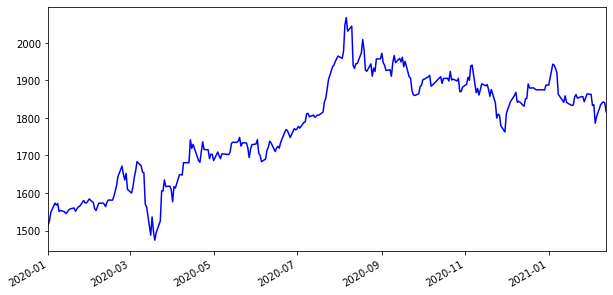

In [183]:
data['gld_price'].plot(kind='line',color='blue',figsize=(10,5))

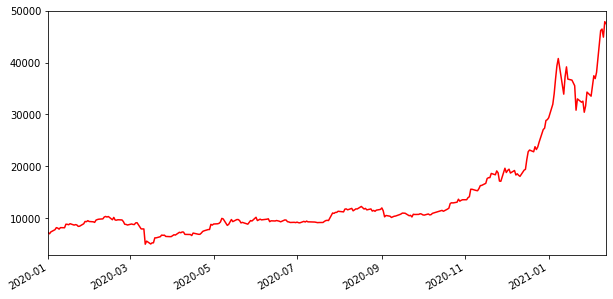

In [184]:
data['bitcoin_price'].plot(kind='line',color='red',figsize=(10,5))

In [185]:
#normalization and plot function
def plot_df(data,columns):
    plt_data = data.copy()
    min_max_scaler = preprocessing.MinMaxScaler()
    for i in data.columns:
        scale = min_max_scaler.fit_transform(plt_data[i].values.reshape(-1,1))
        temp = pd.DataFrame(scale, columns=[i], index = data.index)
        plt_data[i] = temp
    ax = plt.gca()
    plt_data.plot(kind='line', y='gld_price',ax=ax,color='blue',figsize=(10,5))
    plt_data.plot(kind='line', y=columns,ax=ax,color='red')
    plt.show()

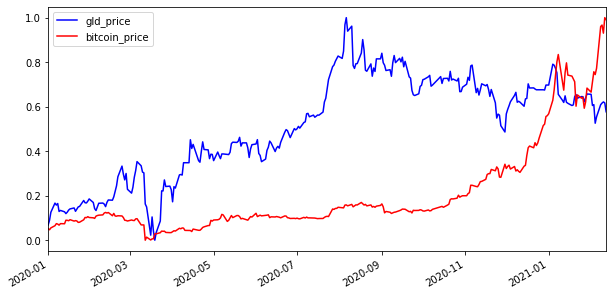

In [186]:
#plot all feature
for i in data.columns:
    if i != 'gld_price':
        plot_df(data,i)

## CORRELATION

In [187]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,gld_price,bitcoin_price
gld_price,1,0.395464
bitcoin_price,0.395464,1


## GRANGER CAUSATION TEST

In [188]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [189]:
granger = grangers_causation_matrix(data, variables = data.columns)
granger

,gld_price_x,bitcoin_price_x
gld_price_y,1.0000,0.57
bitcoin_price_y,0.2338,1.00


## COINTEGRATION TEST

In [190]:
cointegration_test(data)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
gld_price ::  11.63     > 12.3212   =>   False
bitcoin_price ::  2.13      > 4.1296    =>   False


In [191]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [192]:
for name, column in data.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "gld_price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.7261
 No. Lags Chosen       = 4
 Critical value 1%     = -3.454
 Critical value 5%     = -2.872
 Critical value 10%    = -2.572
 => P-Value = 0.4177. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "bitcoin_price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 3.8931
 No. Lags Chosen       = 16
 Critical value 1%     = -3.455
 Critical value 5%     = -2.872
 Critical value 10%    = -2.572
 => P-Value = 1.0. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [193]:
## 1st Diff
df_diff = data.diff().dropna()

In [194]:
for name, column in df_diff.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "gld_price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.0083
 No. Lags Chosen       = 3
 Critical value 1%     = -3.454
 Critical value 5%     = -2.872
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "bitcoin_price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.7629
 No. Lags Chosen       = 9
 Critical value 1%     = -3.454
 Critical value 5%     = -2.872
 Critical value 10%    = -2.572
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


